In [2]:
import pandas as pd
import glob
import numpy as np

# Get all CSV files ending with '_average.csv'
files = glob.glob('*_average.csv')

# Initialize a dictionary to store ranks for each transformation
transformation_ranks = {}

# Read each file and extract ranks
for file in files:
    df = pd.read_csv(file)
    for _, row in df.iterrows():
        transformation = row['Transformation']
        rank = row['Rank']
        if transformation not in transformation_ranks:
            transformation_ranks[transformation] = []
        transformation_ranks[transformation].append(rank)

# Compute mean and standard deviation of ranks
results = []
for transformation, ranks in transformation_ranks.items():
    mean_rank = np.mean(ranks)
    std_rank = np.std(ranks)
    results.append({
        'Transformation': transformation,
        'Mean Rank': mean_rank,
        'Std Dev Rank': std_rank
    })

# Create a DataFrame with the results
result_df = pd.DataFrame(results)

# Sort the DataFrame by Mean Rank
result_df = result_df.sort_values('Mean Rank')

# Display the results
print(result_df)


  Transformation  Mean Rank  Std Dev Rank
3    Yeo-Johnson        2.1      1.135782
1         Robust        2.7      1.100000
2       Standard        2.9      1.135782
4         MinMax        2.9      1.374773
0       Quantile        4.4      1.200000
5        Binning        6.0      0.000000


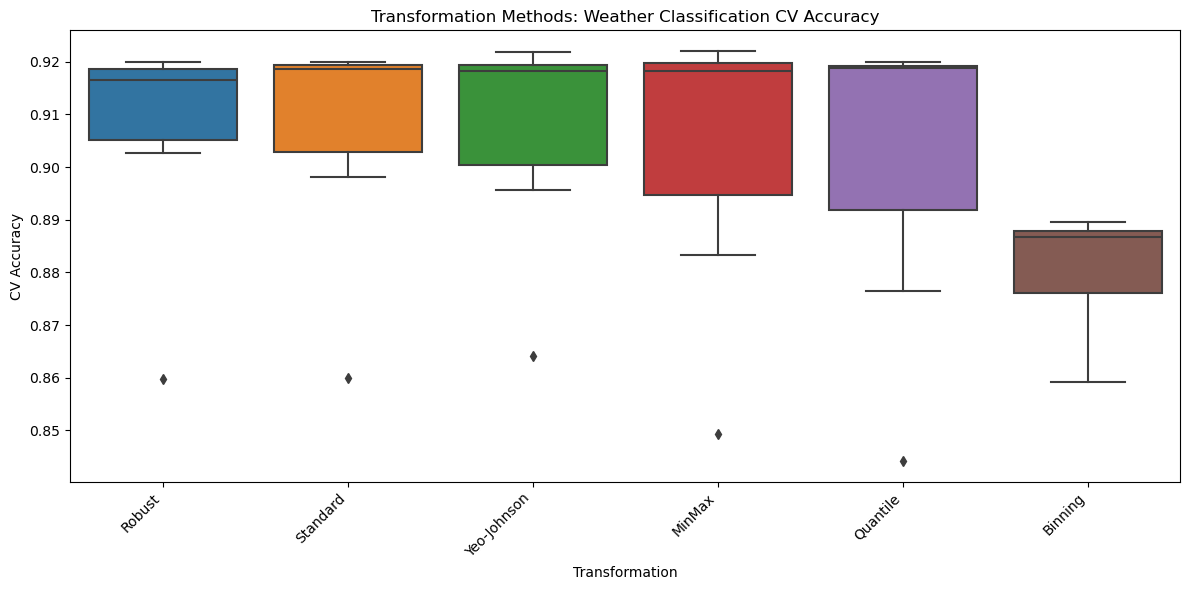

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_prefix = "weather"  # Change this to any word you like
df =  pd.read_csv(f'{file_prefix}_compared.csv')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transformation', y='Transformation CV Accuracy', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Transformation')
plt.ylabel('CV Accuracy')
plt.title('Transformation Methods: Weather Classification CV Accuracy')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
import pandas as pd
import glob
import numpy as np

# Get all CSV files ending with '_average.csv'
files = glob.glob('*_average.csv')

# Initialize dictionaries to store ranks and CV Improvements for each transformation
transformation_ranks = {}
transformation_cv_improvements = {}

# Read each file and extract ranks and CV Improvements
for file in files:
    df = pd.read_csv(file)
    for _, row in df.iterrows():
        transformation = row['Transformation']
        rank = row['Rank']
        cv_improvement = row['CV Improvement']
        
        if transformation not in transformation_ranks:
            transformation_ranks[transformation] = []
            transformation_cv_improvements[transformation] = []
        
        transformation_ranks[transformation].append(rank)
        transformation_cv_improvements[transformation].append(cv_improvement)

# Compute mean and standard deviation of ranks, and mean of CV Improvements
results = []
for transformation in transformation_ranks:
    ranks = transformation_ranks[transformation]
    cv_improvements = transformation_cv_improvements[transformation]
    
    mean_rank = np.mean(ranks)
    std_rank = np.std(ranks)
    mean_cv_improvement = np.mean(cv_improvements)
    
    results.append({
        'Transformation': transformation,
        'Mean Rank': mean_rank,
        'Std Dev Rank': std_rank,
        'Mean CV Improvement': mean_cv_improvement
    })

# Create a DataFrame with the results
result_df = pd.DataFrame(results)

# Sort the DataFrame by Mean Rank
result_df = result_df.sort_values('Mean Rank')

# Display the results
print(result_df)

  Transformation  Mean Rank  Std Dev Rank  Mean CV Improvement
3    Yeo-Johnson        2.1      1.135782             0.020553
1         Robust        2.7      1.100000             0.019828
2       Standard        2.9      1.135782             0.019113
4         MinMax        2.9      1.374773             0.018949
0       Quantile        4.4      1.200000             0.015530
5        Binning        6.0      0.000000            -0.016258


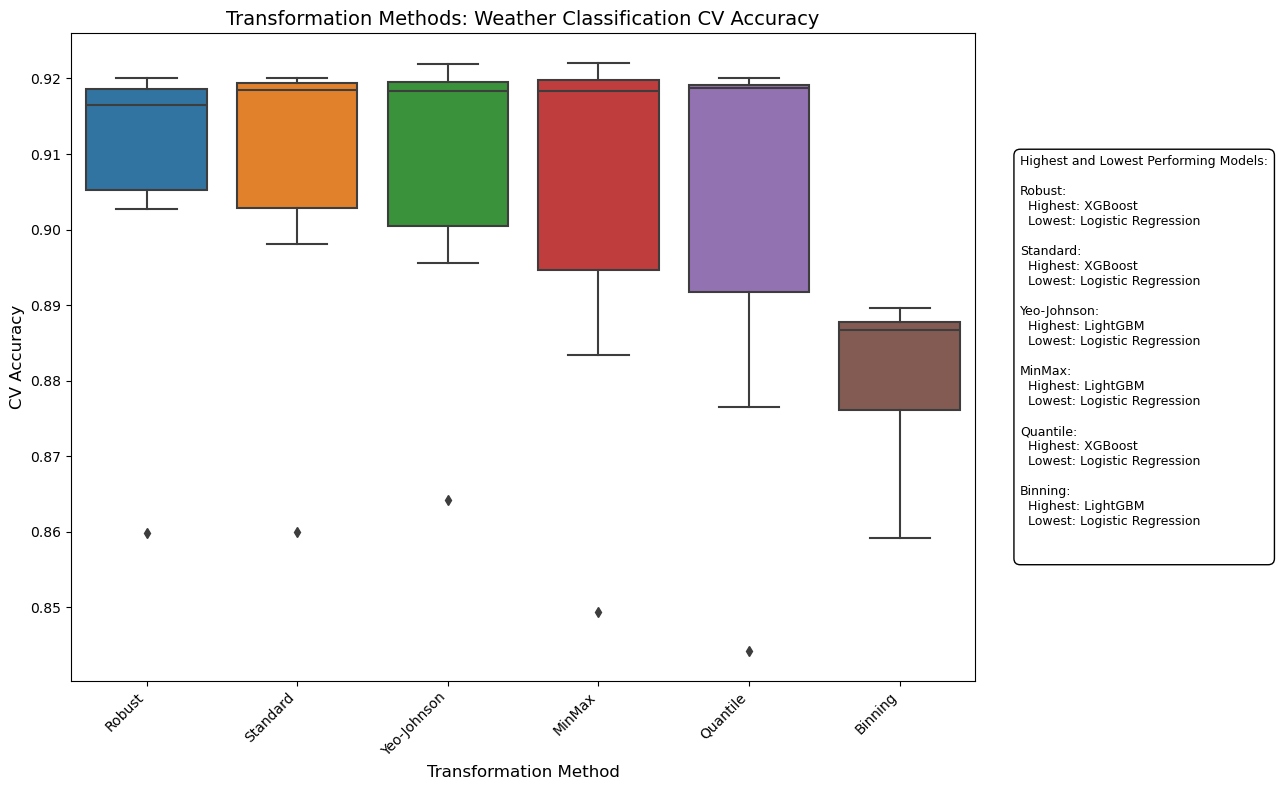

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_prefix = "weather"  # Change this to any word you like
df = pd.read_csv(f'{file_prefix}_compared.csv')

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Transformation', y='Transformation CV Accuracy', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Transformation Method', fontsize=12)
plt.ylabel('CV Accuracy', fontsize=12)
plt.title('Transformation Methods: Weather Classification CV Accuracy', fontsize=14)

# Function to get highest and lowest performing models
def get_extreme_models(data, transformation):
    subset = data[data['Transformation'] == transformation]
    highest = subset.loc[subset['Transformation CV Accuracy'].idxmax()]['Model']
    lowest = subset.loc[subset['Transformation CV Accuracy'].idxmin()]['Model']
    return highest, lowest

# Create text for the box
text_content = "Highest and Lowest Performing Models:\n\n"
for transformation in df['Transformation'].unique():
    highest, lowest = get_extreme_models(df, transformation)
    text_content += f"{transformation}:\n  Highest: {highest}\n  Lowest: {lowest}\n\n"

# Add text box
plt.text(1.05, 0.5, text_content, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),
         verticalalignment='center', fontsize=9)

# Adjust layout to prevent cutting off labels and text box
plt.tight_layout()
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()